In [ ]:
## prepare

In [1]:
import pandas as pd
import os, sys
sys.path.append("..")
from utils.getfund import data_operator
import pandas as pd
from utils.operatefund import Operator, User
from models.models import db_operator
from utils.readconfig import config
import datetime
from multiprocessing import Process, Queue, Pool
# from strategies.fixed import Strategy
exec("from strategies.{} import Strategy".format(config["strategy_file"]))
from concurrent.futures import ThreadPoolExecutor
from strategies.fixed import Strategy
import datetime
import cupy as cp

------------------ F:\Projects\pricepredictor\data\db\MyFund.db
------------- sqlite:///F:\Projects\pricepredictor\data\db\MyFund.db?check_same_thread=False
2020-07-11 16:02:03,843 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-07-11 16:02:03,844 INFO sqlalchemy.engine.base.Engine ()
2020-07-11 16:02:03,845 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-07-11 16:02:03,845 INFO sqlalchemy.engine.base.Engine ()
2020-07-11 16:02:03,847 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("Fund")
2020-07-11 16:02:03,847 INFO sqlalchemy.engine.base.Engine ()
2020-07-11 16:02:03,849 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("Record")
2020-07-11 16:02:03,849 INFO sqlalchemy.engine.base.Engine ()
2020-07-11 16:02:03,850 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("User")
2020-07-11 16:02:03,851 INFO sqlalchemy.engine.base.Engine ()
2020-07-11 16:02:03,852

In [3]:
fund_list_all = data_operator.get_funds_list("F:\\Projects\\pricepredictor\\data\\fund_data\\all_fund.csv")
fund_code_list = fund_list_all.ID.values
fd_data = data_operator.load_funds(fund_code_list)
print(len(fd_data.sort_values(by="date")))

6123682


In [14]:
import seaborn as sns
import sklearn
long_fd_list = fd_data[fd_data.date>datetime.datetime(2020,2,1)].fund_code.unique()
long_fd_list1 = fd_data[fd_data.date<datetime.datetime(2012,2,1)].fund_code.unique()
long_fd_list

array(['000001', '000003', '000004', ..., '519953', '519955', '007115'],
      dtype=object)

In [15]:
import numpy as np
len(long_fd_list)
len(long_fd_list1)
len(np.intersect1d(long_fd_list,long_fd_list1))
long_fd_list = np.intersect1d(long_fd_list,long_fd_list1)
long_fd_list

array(['000001', '000011', '000021', '000031', '000041', '000051',
       '000061', '001001', '001003', '001011', '001013', '001021',
       '001023', '002001', '002011', '002021', '002031', '020003',
       '020009', '020010', '020011', '020012', '020015', '020018',
       '020019', '020020', '020021', '020023', '040001', '040002',
       '040004', '040005', '040007', '040008', '040009', '040010',
       '040011', '040013', '040015', '040016', '040018', '040019',
       '040020', '040023', '040025', '040026', '040180', '040190',
       '050002', '050006', '050010', '050011', '050012', '050013',
       '050014', '050015', '050016', '050018', '050019', '050020',
       '050021', '050022', '050106', '050111', '050116', '050119',
       '050201', '070001', '070002', '070003', '070005', '070006',
       '070009', '070011', '070012', '070016', '070017', '070018',
       '070020', '070021', '070022', '070025', '070026', '070027',
       '070099', '080002', '080003', '080007', '080008', '0900

In [16]:
fund_groups = fd_data.groupby("fund_code")

In [17]:
# fund's life distribution.
max_date = fund_groups.date.max()
min_date = fund_groups.date.min()
dur = (max_date-min_date.min())
dur = dur.apply(lambda x: x.days)

3076.0
3067.186170942516
0    3076
dtype: int64
Index(['000001', '000003', '000004', '000005', '000006', '000008', '000011',
       '000014', '000015', '000016',
       ...
       '730001', '730002', '740001', '740101', '750001', '750002', '750003',
       '750005', '762001', '770001'],
      dtype='object', name='fund_code', length=6773)


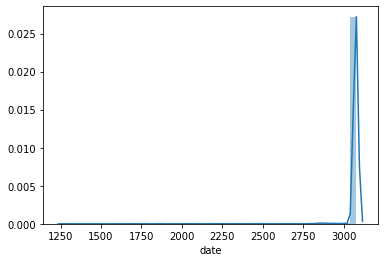

In [18]:
sns.distplot(dur)
print(dur.median())
print(dur.mean())
print(dur.mode())
print(dur[dur==3076].index)
ends_list = dur[dur==3076].index

In [19]:
max_date.max()-datetime.timedelta(days=3076)

Timestamp('2012-01-31 00:00:00')

1233.0
1349.9746192893401
0    3076
dtype: int64


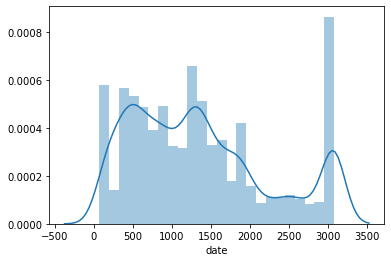

In [20]:
dur = (max_date.max()-min_date)
dur = dur.apply(lambda x:x.days)
print(dur.median())
print(dur.mean())
print(dur.mode())
sns.distplot(dur)

In [21]:
dur.min()

73

In [11]:
len(dur[dur>1280])

3501

In [11]:
max_date.max()-datetime.timedelta(days=1280)

Timestamp('2016-12-31 00:00:00')

In [22]:
import numpy as np
start_lst = dur[dur>=1280].index
# Find the longest time duration with the most funds.
most_lst = np.intersect1d(start_lst,ends_list)
len(most_lst)

3287

In [23]:
len(long_fd_list)

709

In [24]:
for x in long_fd_list:
    print(fund_list_all[fund_list_all.ID==x].Name.iloc[0],fund_list_all[fund_list_all.ID==x].ID.iloc[0] )

华夏成长混合 000001
华夏大盘精选混合 000011
华夏优势增长混合 000021
华夏复兴混合 000031
华夏全球股票(QDII) 000041
华夏沪深300ETF联接A 000051
华夏盛世混合 000061
华夏债券A/B 001001
华夏债券C 001003
华夏希望债券A 001011
华夏希望债券C 001013
华夏亚债中国指数A 001021
华夏亚债中国指数C 001023
华夏回报混合A 002001
华夏红利混合 002011
华夏回报二号混合 002021
华夏策略混合 002031
国泰金龙行业混合 020003
国泰金鹏蓝筹混合 020009
国泰金牛创新成长混合 020010
国泰沪深300指数A 020011
国泰金龙债券C 020012
国泰区位优势混合 020015
国泰金鹿混合 020018
国泰双利债券A 020019
国泰双利债券C 020020
国泰上证180金融ETF联 020021
国泰事件驱动策略混合 020023
华安创新混合 040001
华安中国A股增强指数 040002
华安宝利配置混合 040004
华安宏利混合 040005
华安中小盘成长混合 040007
华安策略优选混合 040008
华安稳定收益债券A 040009
华安稳定收益债券B 040010
华安核心优选混合 040011
华安强化收益债券B 040013
华安动态灵活配置混合 040015
华安行业轮动混合 040016
华安香港精选股票(QDII 040018
华安稳固收益债券C 040019
华安升级主题混合 040020
华安可转债债券B 040023
华安科技动力混合 040025
华安信用四季红债券A 040026
华安上证180ETF联接 040180
华安上证龙头ETF联接 040190
博时沪深300指数A 050002
博时稳定价值债券B 050006
博时特许价值混合A 050010
博时信用债券A/B 050011
博时策略混合 050012
博时上证超大盘ETF联接 050013
博时创业成长混合A 050014
博时大中华亚太精选 050015
博时宏观回报债券A/B 050016
博时行业轮动混合 050018
博时转债增强债券A 050019
博时抗通胀增强回报 050020
博时创业板ET

In [25]:
target_data = fd_data[fd_data.fund_code.isin(long_fd_list)]
target_data.columns

Index(['fund_code', 'date', 'price', 'accumulate', 'daily_rate',
       'purchase_state', 'ransom_state', 'dividends'],
      dtype='object')

In [30]:
len(target_data.fund_code.unique())

709

In [31]:
target_price = target_data[["fund_code","date", "price"]]
target_accumulate = target_data[["fund_code","date","accumulate"]]
target_daily_rate = target_data[["fund_code","date","daily_rate"]]

In [32]:
len(target_accumulate.fund_code.unique())

709

In [33]:
raw_target_price = target_price.set_index("date")
raw_target_price

,fund_code,price
date,,
2012-01-31,000001,0.8910
2012-01-31,000011,10.0220
2012-01-31,000021,1.0500
2012-01-31,000031,1.0620
2012-01-31,000041,0.7910
...,...,...
2020-07-03,690202,1.4790
2020-07-03,700002,2.2040
2020-07-03,710001,2.8322


In [34]:
target_price = pd.pivot(raw_target_price,columns="fund_code", values="price")
target_price = target_price.rename_axis(columns=None, index=None)
target_price.columns

Index(['000001', '000011', '000021', '000031', '000041', '000051', '000061',
       '001001', '001003', '001011',
       ...
       '690001', '690002', '690003', '690004', '690005', '690202', '700002',
       '710001', '720001', '730001'],
      dtype='object', length=709)

In [18]:
# import matplotlib.pyplot as plt
# target_price_corr = target_price.corr()
# plt.figure(figsize=(9,9))
# sns.heatmap(target_price_corr, annot=True, vmax=1, square=True, cmap="Blues")
# plt.show()
target_price


,000001,000003,000004,000005,000006,000008,000011,000014,000015,000016,...,730001,730002,740001,740101,750001,750002,750003,750005,762001,770001
2012-01-31,0.891,NaN,NaN,NaN,NaN,NaN,10.022,NaN,NaN,NaN,...,1.0050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-01,0.884,NaN,NaN,NaN,NaN,NaN,9.963,NaN,NaN,NaN,...,1.0040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-02,0.898,NaN,NaN,NaN,NaN,NaN,10.130,NaN,NaN,NaN,...,1.0070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-03,0.905,NaN,NaN,NaN,NaN,NaN,10.269,NaN,NaN,NaN,...,1.0110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-06,0.905,NaN,NaN,NaN,NaN,NaN,10.276,NaN,NaN,NaN,...,1.0110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-29,1.278,0.774,0.772,1.008,1.5717,1.5564,14.703,1.349,1.249,1.217,...,1.4727,1.2161,1.077,1.314,1.637,1.093,1.080,1.3268,1.8340,1.3134
2020-06-30,1.301,0.784,0.783,1.009,1.6039,1.5827,14.910,1.361,1.250,1.218,...,1.4970,1.2230,1.105,1.334,1.682,1.093,1.080,1.3285,1.8582,1.3454
2020-07-01,1.308,0.808,0.807,1.010,1.6174,1.5870,15.368,1.374,1.250,1.218,...,1.4937,1.2528,1.106,1.354,1.695,1.093,1.081,1.3345,1.8594,1.3425
2020-07-02,1.313,0.864,0.862,1.011,1.6332,1.6116,15.602,1.403,1.250,1.218,...,1.5024,1.2848,1.113,1.369,1.714,1.094,1.082,1.3399,1.8553,1.3440


In [40]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
print(target_price)
af = AffinityPropagation().fit(target_price.transpose())
labels = af.labels_
clusters = af.cluster_centers_indices_
ncluster = len(clusters)

000001  000011  000021  000031  000041  000051  000061  001001  \
2012-01-31   0.891  10.022   1.050   1.062   0.791  0.7100   0.688   1.047   
2012-02-01   0.884   9.963   1.042   1.053   0.793  0.7000   0.681   1.046   
2012-02-02   0.898  10.130   1.060   1.073   0.806  0.7160   0.693   1.046   
2012-02-03   0.905  10.269   1.070   1.084   0.810  0.7210   0.702   1.047   
2012-02-06   0.905  10.276   1.074   1.082   0.807  0.7210   0.702   1.047   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2020-06-29   1.278  14.703   2.283   2.852   1.162  1.3836   0.914   1.133   
2020-06-30   1.301  14.910   2.342   2.960   1.177  1.4023   0.932   1.140   
2020-07-01   1.308  15.368   2.339   2.951   1.177  1.4290   0.943   1.145   
2020-07-02   1.313  15.602   2.330   2.927   1.212  1.4573   0.944   1.159   
2020-07-03   1.314  15.738   2.351   2.953   1.212  1.4840   0.947   1.167   

            001003  001011  ...  690001  690002  690003  690004  690005  \


In [41]:
# from sklearn.datasets.samples_generator import make_blobs
 
# # #############################################################################
# # Generate sample data
# centers = [[1, 1], [-1, -1], [1, -1]]
# X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5,random_state=0)
# print(X)
# print("------------------")
# print(labels_true)
target_price.isnull().any()
target_price.transpose().isnull().any()

2012-01-31    False
2012-02-01    False
2012-02-02    False
2012-02-03    False
2012-02-06    False
              ...  
2020-06-29    False
2020-06-30    False
2020-07-01    False
2020-07-02    False
2020-07-03    False
Length: 2062, dtype: bool

In [42]:
target_price[target_price.index=="2020-07-02"]

,000001,000011,000021,000031,000041,000051,000061,001001,001003,001011,...,690001,690002,690003,690004,690005,690202,700002,710001,720001,730001
2020-07-02,1.313,15.602,2.33,2.927,1.212,1.4573,0.944,1.159,1.144,1.184,...,2.165,1.496,0.984,2.314,2.337,1.478,2.182,2.8078,3.355,1.5024


In [43]:
for col in target_price.columns:
    nanlst = np.where(np.isnan(target_price[col]))[0]
    for i in nanlst:
        if i > 0:
            target_price[col].iloc[i] = target_price[col].iloc[i-1]
        else:
            target_price[col].iloc[i] = target_price[col].iloc[i+1]
target_price[target_price.isnull().values==True]

,000001,000011,000021,000031,000041,000051,000061,001001,001003,001011,...,690001,690002,690003,690004,690005,690202,700002,710001,720001,730001


In [44]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
af = AffinityPropagation().fit(target_price.transpose())
labels = af.labels_
clusters = af.cluster_centers_indices_
ncluster = len(clusters)

In [45]:
labels.max()
len(labels)

709

In [58]:
target_daily_rate

fund_code,000001,000011,000021,000031,000041,000051,000061,001001,001003,001011,...,690001,690002,690003,690004,690005,690202,700002,710001,720001,730001
date,,,,,,,,,,,,,,,,,,,,,
2012-01-31,-0.0011,0.0001,0.0086,-0.0009,0.008900,0.0014,0.0044,0.0010,0.0010,0.0010,...,-0.0022,0.0000,0.0000,-0.0015,0.0013,0.0000,0.0010,0.0004,0.0000,-0.0010
2012-02-01,-0.0079,-0.0059,-0.0076,-0.0085,0.002500,-0.0141,-0.0102,-0.0010,-0.0010,-0.0010,...,-0.0078,-0.0019,-0.0098,-0.0107,-0.0106,-0.0019,-0.0060,-0.0063,-0.0124,-0.0010
2012-02-02,0.0158,0.0168,0.0173,0.0190,0.016400,0.0229,0.0176,0.0000,0.0010,0.0010,...,0.0135,0.0075,0.0156,0.0154,0.0161,0.0067,0.0120,0.0113,0.0193,0.0030
2012-02-03,0.0078,0.0137,0.0094,0.0103,0.005000,0.0070,0.0130,0.0010,0.0000,0.0010,...,0.0056,0.0009,0.0070,0.0045,0.0079,0.0019,0.0099,0.0057,0.0038,0.0040
2012-02-06,0.0000,0.0007,0.0037,-0.0018,-0.003700,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0022,0.0009,0.0028,0.0000,0.0000,0.0000,0.0020,0.0024,-0.0047,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-29,-0.0070,-0.0074,-0.0035,-0.0049,-0.006000,-0.0067,-0.0022,-0.0026,-0.0027,0.0000,...,-0.0019,0.0007,-0.0021,0.0044,0.0040,0.0000,-0.0053,0.0046,-0.0079,-0.0143
2020-06-30,0.0180,0.0141,0.0258,0.0379,0.012900,0.0135,0.0197,0.0062,0.0063,0.0034,...,0.0212,0.0047,0.0073,0.0133,0.0216,0.0048,0.0202,0.0216,0.0263,0.0165
2020-07-01,0.0054,0.0307,-0.0013,-0.0030,0.012900,0.0190,0.0118,0.0044,0.0044,0.0000,...,0.0005,0.0034,0.0114,0.0087,0.0091,0.0034,0.0136,-0.0005,-0.0036,-0.0022


In [47]:
raw_target_rate = target_daily_rate.set_index('date')
target_daily_rate

,fund_code,date,daily_rate
0,000001,2012-01-31,-0.0011
1,000011,2012-01-31,0.0001
2,000021,2012-01-31,0.0086
3,000031,2012-01-31,-0.0009
4,000041,2012-01-31,0.0089
...,...,...,...
6123657,690202,2020-07-03,0.0007
6123660,700002,2020-07-03,0.0101
6123665,710001,2020-07-03,0.0087
6123669,720001,2020-07-03,-0.0051


In [60]:
raw_target_daily_rate = target_daily_rate.pivot(index = 'date',columns='fund_code', values='daily_rate')
target_daily_rate = raw_target_daily_rate

KeyError: 'date'

In [63]:
# cluster the funds by using affinity propagation on increase rate
# step 1, check the default value and fill default value by neighbor value. for instance: [0.02, NaN, 0.01]->[0.02, 0.02, 0.01]
temp = target_daily_rate
for col in target_daily_rate.columns:
    nanlst = np.where(np.isnan(target_daily_rate[col]))[0]
    for i in nanlst:
        if i > 0:
            target_daily_rate[col].iloc[i] = target_daily_rate[col].iloc[i-1]
        else:
            target_daily_rate[col].iloc[i] = target_daily_rate[col].iloc[i+1]
target_daily_rate[target_daily_rate.isnull().values==True]

fund_code,000001,000011,000021,000031,000041,000051,000061,001001,001003,001011,...,690001,690002,690003,690004,690005,690202,700002,710001,720001,730001
date,,,,,,,,,,,,,,,,,,,,,


In [64]:
# Perform clustering
from sklearn.cluster import AffinityPropagation
cluster_model = AffinityPropagation()
cluster_model.fit(target_daily_rate.transpose())
result_labels = cluster_model.predict(target_daily_rate.transpose())
clusters = np.unique(result_labels)
clusters

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21], dtype=int64)

In [51]:
# show in dict with fund name.
target_fund_codes = target_daily_rate.columns
clusters_dict = dict()
for clus in np.unique(result_labels):
    clusters_dict[clus] = []
for i in range(len(target_fund_codes)):
    clusters_dict[result_labels[i]].append(target_fund_codes[i])
clusters_dict
clusters_dict_with_names = dict()
for x in clusters_dict.keys():
    clusters_dict_with_names[x] = fund_list_all[fund_list_all.ID.isin(clusters_dict[x])][['ID','Name']]
clusters_dict_with_names

{0:           ID           Name
 Num                        
 14    161605       融通蓝筹成长混合
 707   210002       金鹰红利价值混合
 782   519039       长盛同德主题混合
 1096  121002     国投瑞银景气行业混合
 1137  050022         博时回报混合
 1409  110001      易方达平稳增长混合
 1517  180018       银华和谐主题混合
 1639  210007  金鹰技术领先灵活配置混合A
 1671  163807         中银优选混合
 1727  270001         广发聚富混合
 1755  202023      南方优选成长混合A
 1853  000001         华夏成长混合
 1876  002031         华夏策略混合
 1973  002001        华夏回报混合A
 2008  070001      嘉实成长收益混合A
 2042  530011       建信内生动力混合
 2052  002021       华夏回报二号混合
 2283  217002       招商安泰平衡混合
 2302  519066      汇添富蓝筹稳健混合
 2604  210001       金鹰成份优选混合
 2662  673010      西部利得新动向混合
 2702  519015      海富通精选贰号混合
 2754  519697       交银优势行业混合
 2828  163402  兴全趋势投资混合(LOF)
 2884  340008       兴全有机增长混合
 2907  620001     金元顺安宝石动力混合
 3156  040001         华安创新混合
 3217  100056       富国低碳环保混合
 3446  233008       大摩消费领航混合
 3682  151001         银河稳健混合
 5142  070018         嘉实回报混合
 5665  161219     国投瑞银新兴产业混合
 5749  3730

In [52]:
long_fd_list

array(['000001', '000011', '000021', '000031', '000041', '000051',
       '000061', '001001', '001003', '001011', '001013', '001021',
       '001023', '002001', '002011', '002021', '002031', '020003',
       '020009', '020010', '020011', '020012', '020015', '020018',
       '020019', '020020', '020021', '020023', '040001', '040002',
       '040004', '040005', '040007', '040008', '040009', '040010',
       '040011', '040013', '040015', '040016', '040018', '040019',
       '040020', '040023', '040025', '040026', '040180', '040190',
       '050002', '050006', '050010', '050011', '050012', '050013',
       '050014', '050015', '050016', '050018', '050019', '050020',
       '050021', '050022', '050106', '050111', '050116', '050119',
       '050201', '070001', '070002', '070003', '070005', '070006',
       '070009', '070011', '070012', '070016', '070017', '070018',
       '070020', '070021', '070022', '070025', '070026', '070027',
       '070099', '080002', '080003', '080007', '080008', '0900

In [53]:
len(target_data.fund_code.unique())

709

In [54]:
target_data[target_data.fund_code=='000001']

,fund_code,date,price,accumulate,daily_rate,purchase_state,ransom_state,dividends
0,000001,2012-01-31,0.891,2.992,-0.0011,限制大额申购,开放赎回,
711,000001,2012-02-01,0.884,2.985,-0.0079,限制大额申购,开放赎回,
1424,000001,2012-02-02,0.898,2.999,0.0158,限制大额申购,开放赎回,
2136,000001,2012-02-03,0.905,3.006,0.0078,限制大额申购,开放赎回,
2857,000001,2012-02-06,0.905,3.006,0.0000,限制大额申购,开放赎回,
...,...,...,...,...,...,...,...,...
6089875,000001,2020-06-29,1.278,3.739,-0.0070,开放申购,开放赎回,
6096570,000001,2020-06-30,1.301,3.762,0.0180,开放申购,开放赎回,
6103674,000001,2020-07-01,1.308,3.769,0.0054,开放申购,开放赎回,
6110298,000001,2020-07-02,1.313,3.774,0.0038,开放申购,开放赎回,


In [55]:
# save the result on local
import pickle
with open("clusters_dict_with_names.pkl", 'wb') as f:
    pickle.dump(clusters_dict_with_names, f)

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

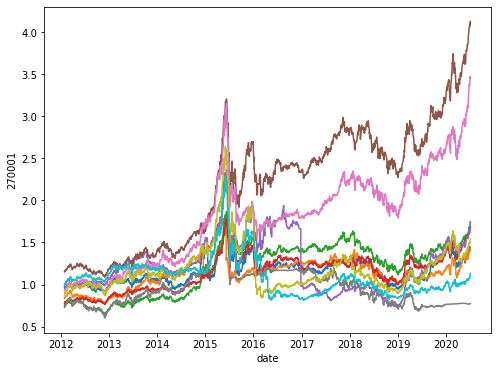

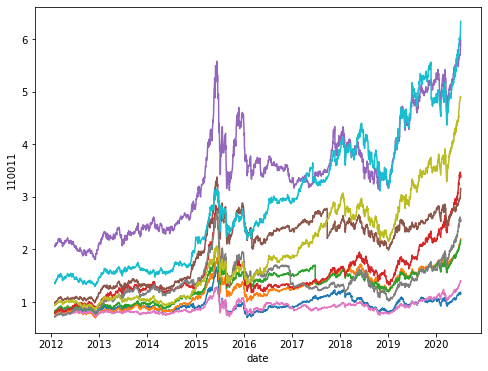

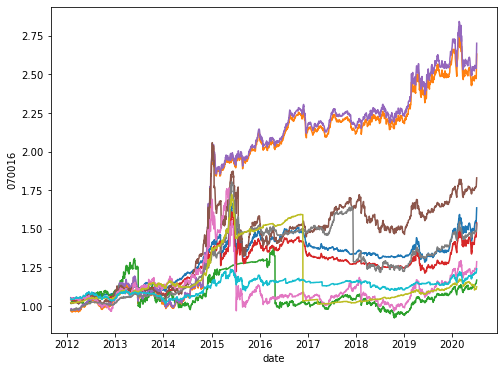

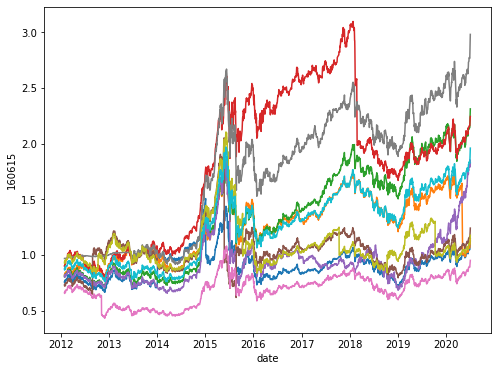

In [67]:
# check the price changing map
plt.figure(figsize=(8,6))
for x in clusters_dict_with_names[0].ID[:10]:
    ax = sns.lineplot(data = target_price, x=target_daily_rate.index, y=x,legend='brief')
plt.figure(figsize=(8,6))
for x in clusters_dict_with_names[10].ID[0:10]:
    ax = sns.lineplot(data = target_price, x=target_daily_rate.index, y=x)
plt.figure(figsize=(8,6))
for x in clusters_dict_with_names[15].ID[0:10]:
    ax = sns.lineplot(data = target_price, x=target_daily_rate.index, y=x)
plt.figure(figsize=(8,6))
for x in clusters_dict_with_names[20].ID[0:10]:
    ax = sns.lineplot(data = target_price, x=target_daily_rate.index, y=x)

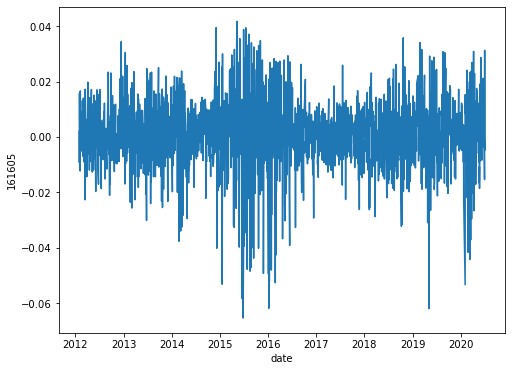

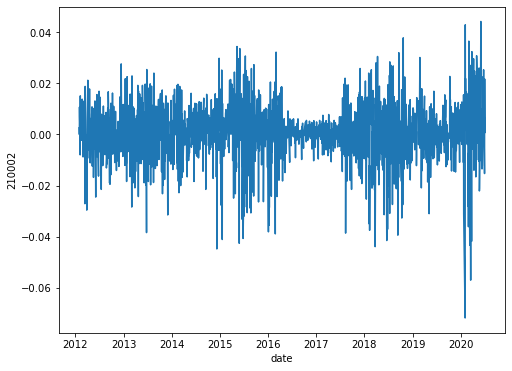

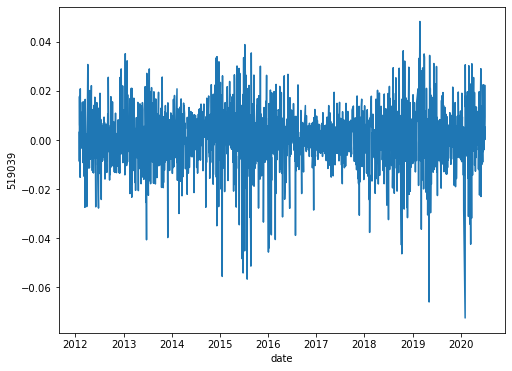

In [66]:

for x in clusters_dict_with_names[0].ID[:3]:
    plt.figure(figsize=(8,6))
    ax = sns.lineplot(data = target_daily_rate, x=target_daily_rate.index, y=x,legend='brief')
for x in clusters_dict_with_names[0].ID[:3]:
    plt.figure(figsize=(8,6))
    ax = sns.lineplot(data = target_daily_rate, x=target_daily_rate.index, y=x,legend='brief')
# plt.figure(figsize=(8,6))
# for x in clusters_dict_with_names[10].ID[0:3]:
#     ax = sns.lineplot(data = target_daily_rate, x=target_daily_rate.index, y=x)
# plt.figure(figsize=(8,6))
# for x in clusters_dict_with_names[15].ID[0:3]:
#     ax = sns.lineplot(data = target_daily_rate, x=target_daily_rate.index, y=x)
# plt.figure(figsize=(8,6))
# for x in clusters_dict_with_names[20].ID[0:3]:
#     ax = sns.lineplot(data = target_daily_rate, x=target_daily_rate.index, y=x)

In [83]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
af = AffinityPropagation().fit(target_price.transpose())
price_labels = af.labels_
price_clusters_centers = af.cluster_centers_indices_
ncluster = len(clusters)
price_labels

array([ 0,  1,  2,  2, 42, 17, 48, 24, 24, 10, 10, 10, 10, 51,  3, 10, 35,
       22, 11, 21,  5, 24,  4, 24, 52, 51, 38,  4,  5,  5,  0,  6, 45, 27,
       10, 10, 53, 51, 45, 45, 32, 10, 38,  0, 35, 24, 32, 13, 27, 52, 45,
       33, 32, 42,  7, 10, 10, 17, 38, 22, 27, 40, 52, 33, 10, 38,  5, 17,
        8, 17, 40,  9, 24, 21,  5, 10, 32, 13, 24, 12, 39, 10, 10, 39, 45,
       11, 40, 11,  7, 48, 24, 42, 17, 19, 19, 47, 47,  4, 11,  0, 24, 52,
       32,  5, 38,  0, 52, 19, 12, 24, 19, 13, 52, 33, 24, 16, 14, 27, 23,
       51, 51,  0, 15, 45, 16, 46, 51, 51, 17, 13, 13, 46, 12, 39, 52, 51,
       51, 21, 53, 32, 48,  5, 45, 22, 24, 52, 52, 45, 52, 11, 38, 42, 10,
       10, 24,  4, 33, 18, 19, 24, 19, 47, 52, 51, 32, 38, 48, 11, 48, 10,
       21, 19, 13, 10, 10, 17, 27, 23, 24, 23, 48, 38, 13, 24, 17, 39, 24,
       10, 24, 52, 23,  0, 19, 19, 24, 22, 45, 48, 10, 13, 10, 27, 17,  2,
       17, 17, 45, 24, 42, 12, 48, 17, 22, 24,  0, 47, 10, 42, 19, 24,  0,
       21, 32, 20, 24, 21

In [76]:
# show in dict with fund name.
target_fund_codes = target_price.columns
clusters_price_dict = dict()
for clus in np.unique(price_labels):
    clusters_price_dict[clus] = []
for i in range(len(target_fund_codes)):
    clusters_price_dict[price_labels[i]].append(target_fund_codes[i])
clusters_dict
clusters_price_with_names = dict()
for x in clusters_price_dict.keys():
    clusters_price_with_names[x] = fund_list_all[fund_list_all.ID.isin(clusters_price_dict[x])][['ID','Name']]
clusters_price_with_names[0]

,ID,Name
Num,,
146,090017,大成可转债增强债券
190,200011,长城景气行业龙头混合
242,580007,东吴安享量化混合
391,510081,长盛动态精选混合
639,161207,国投瑞银沪深300指数分级
691,580005,东吴进取策略混合
1114,100032,富国中证红利指数增强
1237,450003,国富潜力组合混合A
1331,260111,景顺长城公司治理混合


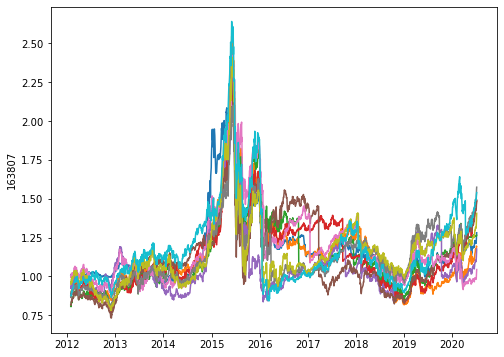

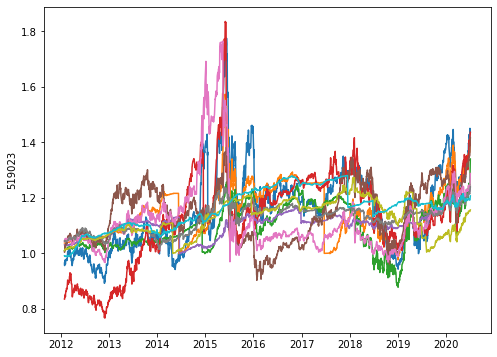

In [82]:
plt.figure(figsize=(8,6))
for x in clusters_price_with_names[0].ID[:10]:
    ax = sns.lineplot(data = target_price, x=target_price.index, y=x,legend='brief')
# plt.figure(figsize=(8,6))
# for x in clusters_price_with_names[1].ID[:10]:
#     ax = sns.lineplot(data = target_price, x=target_price.index, y=x,legend='brief')
plt.figure(figsize=(8,6))
for x in clusters_price_with_names[10].ID[:10]:
    ax = sns.lineplot(data = target_price, x=target_price.index, y=x,legend='brief')